## IoT Traffic Prediction using RNN Models

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("../dataset/esp32_2_data.csv")
df.head() # Display the first few rows of the dataset

,timestamp,temperature,humidity(%),latency(ms),throughput(bytes/sec),packet_loss(%),rssi(dBm)
0,2025-05-12 | 10:14:36,28.7,72.0,0.235840,0.054,0.0,-55
1,2025-05-12 | 10:14:37,28.7,71.9,0.257324,0.054,0.0,-57
2,2025-05-12 | 10:14:40,28.8,71.8,0.309570,0.054,0.0,-64
3,2025-05-12 | 10:14:42,28.8,71.6,0.308838,0.054,0.0,-59
4,2025-05-12 | 10:14:43,28.8,71.6,1.004150,0.054,0.0,-60


### Data Preprocessing
  - Handling missing values
  - Resampling (Convert the timestamp into 1440 minute or data)
  - Normalization / Scaling (MinMaxScaler or StandardScaler)
  - Train-test split

In [3]:
# Change the time column to datetime format and split it into date and time
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d | %H:%M:%S")

# Set the timestamp as the index
df.set_index("timestamp", inplace=True)
df_resampled = df.resample("min").mean()

# Check the shape of the dataset
print(f"Shape of the dataset: {df_resampled.shape}")

# Check the missing values in the dataset
print(f"Missing values in the dataset:\n{df_resampled.isnull().sum()}")

Shape of the dataset: (1896, 6)
Missing values in the dataset:
temperature              118
humidity(%)              118
latency(ms)              118
throughput(bytes/sec)    118
packet_loss(%)           118
rssi(dBm)                118
dtype: int64


In [4]:
# Impute missing values using mean of the column
df_resampled.fillna(df_resampled.mean(), inplace=True)

# Check the missing values after imputation
print(f"Missing values after imputation:\n{df_resampled.isnull().sum()}")

Missing values after imputation:
temperature              0
humidity(%)              0
latency(ms)              0
throughput(bytes/sec)    0
packet_loss(%)           0
rssi(dBm)                0
dtype: int64


In [5]:
# Show the data in 24 hours from 12:00:00 to 12:00:00
df_one_day_format = df_resampled.loc["2025-05-12 12:00:00":"2025-05-13 12:00:00"]

# Check the data
df_one_day_format.head()

,temperature,humidity(%),latency(ms),throughput(bytes/sec),packet_loss(%),rssi(dBm)
timestamp,,,,,,
2025-05-12 12:00:00,31.786031,63.309065,0.282727,0.054,0.0,-58.219259
2025-05-12 12:01:00,31.786031,63.309065,0.282727,0.054,0.0,-58.219259
2025-05-12 12:02:00,31.786031,63.309065,0.282727,0.054,0.0,-58.219259
2025-05-12 12:03:00,31.786031,63.309065,0.282727,0.054,0.0,-58.219259
2025-05-12 12:04:00,31.786031,63.309065,0.282727,0.054,0.0,-58.219259


In [ ]:
# Scale the data using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler and fit it to the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_one_day_format)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_one_day_format.columns, index=df_one_day_format.index)
scaled_df # Plot the scaled data

,temperature,humidity(%),latency(ms),throughput(bytes/sec),packet_loss(%),rssi(dBm)
timestamp,,,,,,
2025-05-12 12:00:00,0.608932,0.536561,0.374941,2.081668e-17,0.0,0.797449
2025-05-12 12:01:00,0.608932,0.536561,0.374941,2.081668e-17,0.0,0.797449
2025-05-12 12:02:00,0.608932,0.536561,0.374941,2.081668e-17,0.0,0.797449
2025-05-12 12:03:00,0.608932,0.536561,0.374941,2.081668e-17,0.0,0.797449
2025-05-12 12:04:00,0.608932,0.536561,0.374941,2.081668e-17,0.0,0.797449
...,...,...,...,...,...,...
2025-05-13 11:56:00,0.796152,0.142666,0.427037,6.938894e-18,0.0,0.719102
2025-05-13 11:57:00,0.799112,0.144811,0.571806,1.387779e-17,0.0,0.708649
2025-05-13 11:58:00,0.804820,0.152670,0.376478,6.938894e-18,0.0,0.667913


### Data Visualization

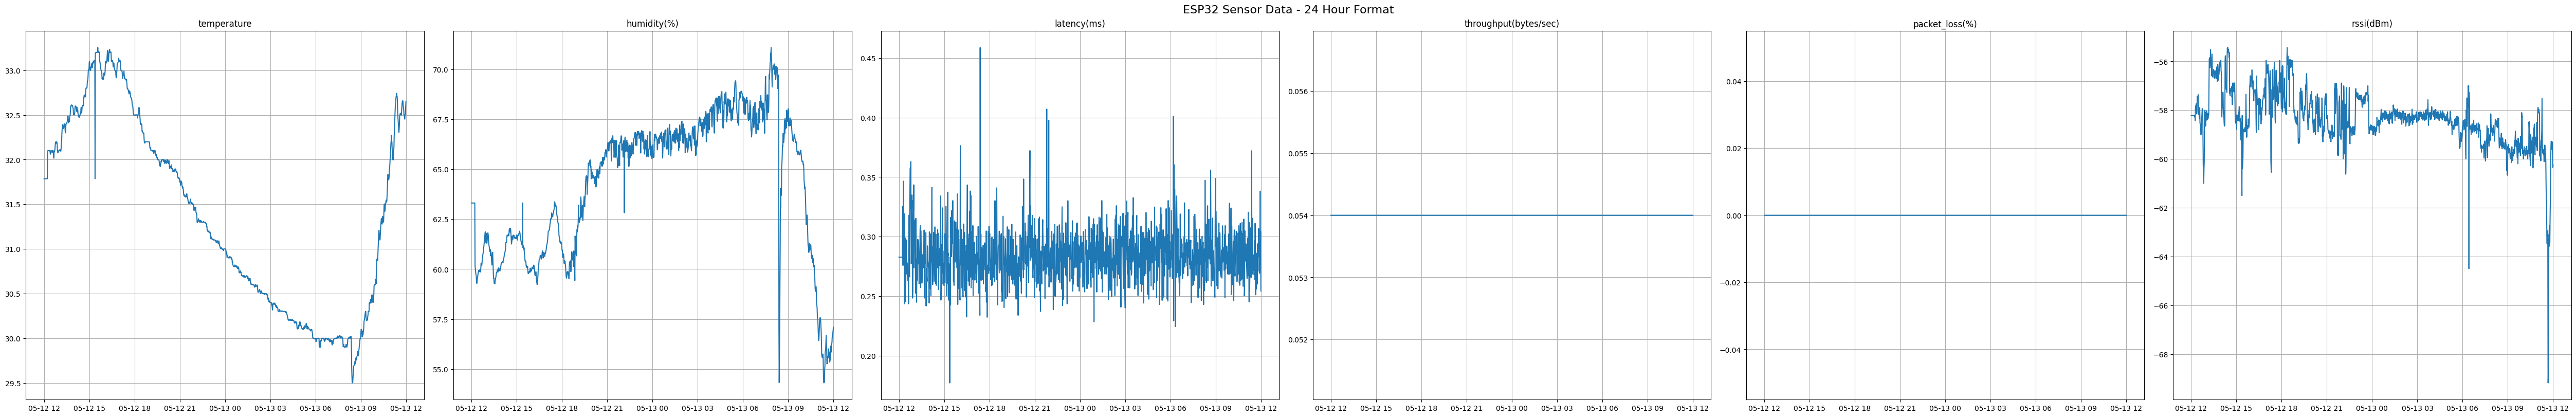

In [7]:
# Define num of rows and columns for the subplots
num_cols = 6
num_rows = int(np.ceil(len(df_one_day_format.columns) / num_cols))

# Create the figure and axes for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 8), constrained_layout=True)

# Flatten the axes array for iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(df_one_day_format.columns):
  axes[i].plot(df_one_day_format[column])
  axes[i].set_title(column)
  axes[i].grid(True)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

# Set the overall title for the figure
fig.suptitle("ESP32 Sensor Data - 24 Hour Format", fontsize=16)
plt.show()